<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean_sales = sum(sales) / len(sales)
print('Sales Mean =',mean_sales)



Sales Mean = 3052.714285714286


In [2]:
var_sales = sum((xi - mean_sales) ** 2 for xi in sales) / (len(sales)-1)

print('Sales Variance =', var_sales)

Sales Variance = 214387.90476190473


In [3]:
std_sales = var_sales**.5
print('Sales SD =',std_sales)

Sales SD = 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
customers = [127, 80, 105, 92, 120, 115, 93]

cov = np.cov(sales,customers)
print(cov)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
mean_customers = sum(customers) / len(customers)
var_customers = sum((xi - mean_customers) ** 2 for xi in customers) / (len(customers)-1)
std_customers = var_customers**.5
print(std_customers)

17.057326313123664


In [6]:
corrco = cov/(std_sales*std_customers)
print(corrco)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

titanic_data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
titanic_numeric = titanic_data.select_dtypes(include='number').drop(columns='Unnamed: 0')

In [9]:
titanic_numeric.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [10]:
titanic_numeric.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [11]:
titanic_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

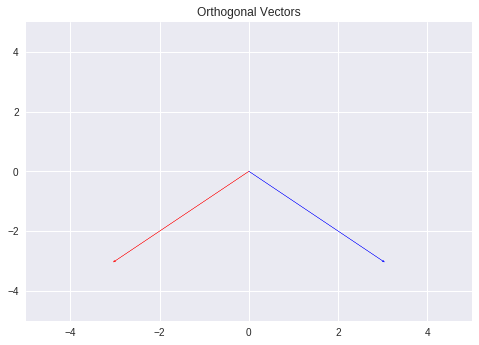

Vectors 1 and 2 Dot Product = 0


In [12]:
import matplotlib.pyplot as plt
v_1 = [-3, -3]
v_2 = [3, -3]

# Plot the Scaled Vectors
plt.arrow(0,0, v_1[0], v_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v_2[0], v_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Orthogonal Vectors")
plt.show()

v_1_2 = np.dot(v_1,v_2)
print('Vectors 1 and 2 Dot Product =',v_1_2)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [13]:
import matplotlib.pyplot as plt

v_a = [-5, 3, 7]
v_b = [6, -8, 2]

v_ab = np.dot(v_a,v_b)
print(v_ab)

-40


Vectors a and b are not orthogonal because the dot product is not 0.

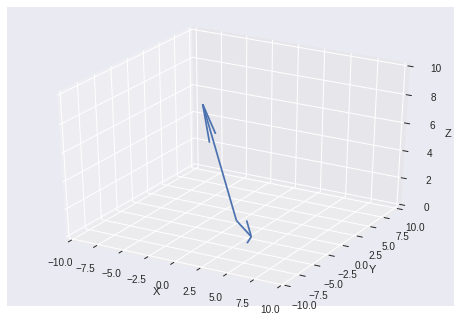

In [14]:
from mpl_toolkits.mplot3d import Axes3D
origin = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(origin, origin, origin, v_a[0], v_a[1], v_a[2], length=1)
ax.quiver(origin, origin, origin, v_b[0], v_b[1], v_b[2], length=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [15]:
v_c = np.array([2, 15, 6, 20])
c_norm = np.linalg.norm(v_c)
c_norm**2


665.0

In [16]:
v_c_c = np.dot(v_c,v_c)
print(v_c_c)

665


In [17]:
np.matmul(v_c.T,v_c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [18]:
v_f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(v_f)
print(f_norm)

19.131126469708992


In [19]:
f_hat = 1/f_norm * v_f
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

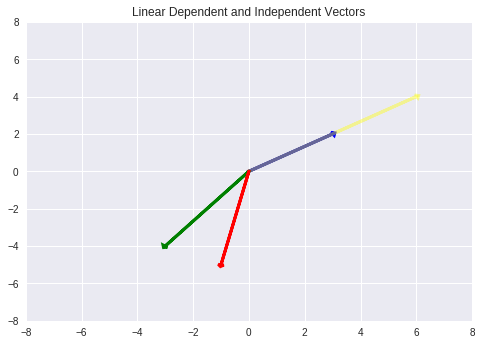

In [20]:
# Plot Linear Dependent and Independent Vectors

# Axis Bounds
plt.xlim(-8,8)          
plt.ylim(-8,8)

# Original Vectors
v_dep = [3,2] 
v_ind = [-3,-4]
v_ind2 = [-1,-5]

# Scaled Dependent Vector
v_dep2 = np.multiply(2, v_dep)

# Plot Dependent Vectors
plt.arrow(0,0, v_dep[0], v_dep[1], linewidth=3, head_width=.2, head_length=0.1, color ='blue')
plt.arrow(0,0, v_dep2[0], v_dep2[1], linewidth=3, head_width=.2, head_length=0.1, alpha=.4, color ='yellow')

# Plot Independent Vectors
plt.arrow(0,0, v_ind[0], v_ind[1], linewidth=3, head_width=.2, head_length=0.1, color ='green')
plt.arrow(0,0, v_ind2[0], v_ind2[1], linewidth=3, head_width=.2, head_length=0.1, color ='red')

plt.title("Linear Dependent and Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [21]:
v_g = np.array([1, 2])
v_h = np.array([4, 8])
v_gh = np.add(v_g,v_h)
v_gh2 = np.subtract(v_g,v_h)

print('Span of Vectors G and H includes',v_gh2,'and', v_gh)

Span of Vectors G and H includes [-3 -6] and [ 5 10]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
v_l = np.array([1, 2, 3])
v_m = np.array([-1, 0, 7])
v_n = np.array([4, 8, 2])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



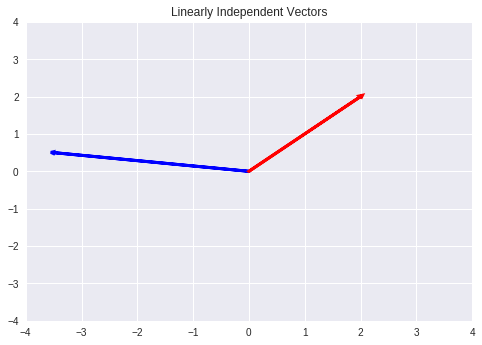

In [23]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Original Vector
vector_b1 = [-3.5,.5] 
vector_b2 = [2, 2]

# Plot Vectors
plt.arrow(0,0, vector_b1[0], vector_b1[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_b2[0], vector_b2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?



```
A set of linearly independent vectors combined to fill the span of the respective vector space.
```



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Step 1: Add 1 times the 1st row to the 2nd row

\begin{align}
 P = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 2 & 10 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

Step 2: Multiply the 2nd row by 1/2 

\begin{align}
 P = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

Step 3: Add -4 times the 1st row to the 3rd row

\begin{align}
 P = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  0 & 0 & 10 
 \end{bmatrix}
\end{align}

Step 4: Multiply the 3rd row by 1/10

\begin{align}
 P = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  0 & 0 & 1 
 \end{bmatrix}
\end{align}

The rank of Matrix P is 3 because all rows are linearly independent and can span in $\mathbb{R}^3$

## 7.2 What does the rank of a matrix tell us?

The rank of matrix tells us the number of dimensions in the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [24]:
v_v = np.array([1,3])
v_w = np.array([-1,2])
projLW = np.dot(v_w,v_v)*v_v / np.dot(v_v,v_v)
print(projLW)


[0.5 1.5]


In [27]:
w_minus_proj = v_w - projLW
print(w_minus_proj)

[-1.5  0.5]


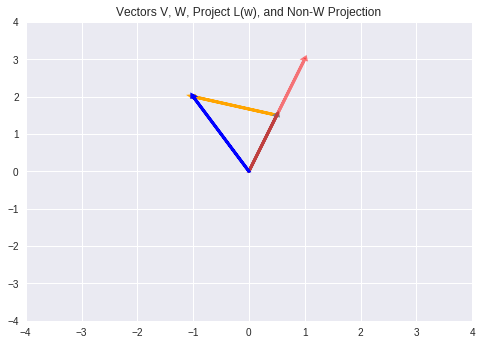

In [29]:


# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

v_v = np.array([1,3])
v_w = np.array([-1,2])

# Plot Vectors
plt.arrow(projLW[0], projLW[1], w_minus_proj[0], w_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0, 0, projLW[0], projLW[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v_v[0], v_v[1], linewidth=3, head_width=.05, head_length=0.05, alpha=.5, color ='red')
plt.arrow(0, 0, v_w[0], v_w[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Vectors V, W, Project L(w), and Non-W Projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

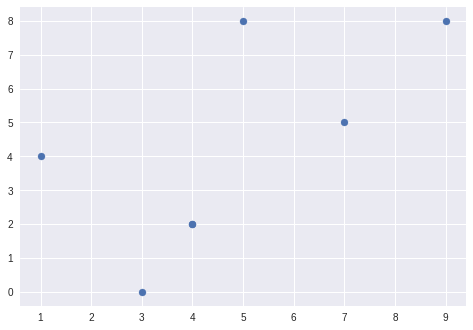

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()